<a href="https://colab.research.google.com/github/manish55shukla/Customer-Service-Request-Analysis/blob/main/Customer_Service_Request_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from scipy.stats import f_oneway

#The function f_oneway from scipy.stats is used to perform a one-way ANOVA (Analysis of Variance).
# The purpose of ANOVA is to test for significant differences between the means of two or more groups.


In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



*   Import CSV file from Drive

In [127]:
df_CSR = pd.read_csv('/content/drive/MyDrive/Travclan/CSR.csv', dtype=str)

In [128]:
df_CSR.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,28157590,06/01/2014 12:00:00 AM,06/06/2014 04:03:44 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,1-2 Family Dwelling,11372,70-04 ROOSEVELT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7464285492033,-73.89534719745205,"(40.7464285492033, -73.89534719745205)"
1,28157974,06/01/2014 12:00:00 AM,06/10/2014 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,10024,336 WEST 77 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.78332297541809,-73.98285513754209,"(40.78332297541809, -73.98285513754209)"
2,28158733,06/01/2014 12:00:00 AM,06/09/2014 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,11355,140-37 ASH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.75566366565145,-73.82277150294146,"(40.75566366565145, -73.82277150294146)"
3,28159418,06/01/2014 12:00:00 AM,06/20/2014 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10458,2604 BAINBRIDGE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.86426508198643,-73.89231285579432,"(40.86426508198643, -73.89231285579432)"
4,28160237,06/01/2014 12:00:00 AM,06/10/2014 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,10024,336 WEST 77 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.78332297541809,-73.98285513754209,"(40.78332297541809, -73.98285513754209)"


In [129]:
df_CSR.describe()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
count,530137,530137,518747,530137,530137,530137,526184,391818,498536,401133,...,22,452,3854,1343,1342,1328,1326,468685,468685,468685
unique,530137,346849,262529,19,189,190,992,117,387,166347,...,3,5,7,57,45,2,517,191164,191164,191164
top,28157590,07/15/2014 12:00:00 AM,07/31/2014 12:00:00 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,RESIDENTIAL BUILDING,11226,70-04 ROOSEVELT AVENUE,...,Car Service,BROOKLYN,Other,BQE/Gowanus Expwy,North/Bronx Bound,Roadway,Ramp,40.7464285492033,-73.89534719745205,"(40.7464285492033, -73.89534719745205)"
freq,1,2152,2571,137585,137585,55850,61497,100095,8407,369,...,20,147,2944,168,129,989,74,316,316,316


In [130]:
df_CSR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530137 entries, 0 to 530136
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique Key                      530137 non-null  object
 1   Created Date                    530137 non-null  object
 2   Closed Date                     518747 non-null  object
 3   Agency                          530137 non-null  object
 4   Agency Name                     530137 non-null  object
 5   Complaint Type                  530137 non-null  object
 6   Descriptor                      526184 non-null  object
 7   Location Type                   391818 non-null  object
 8   Incident Zip                    498536 non-null  object
 9   Incident Address                401133 non-null  object
 10  Street Name                     401109 non-null  object
 11  Cross Street 1                  388465 non-null  object
 12  Cross Street 2                

In [131]:
# To check data types
df_CSR.dtypes

,0
Unique Key,object
Created Date,object
Closed Date,object
Agency,object
Agency Name,object
Complaint Type,object
Descriptor,object
Location Type,object
Incident Zip,object
Incident Address,object


In [132]:
# Finding the % of missing/null data in our dataset
df_CSR.isnull().sum()/len(df_CSR)*100

,0
Unique Key,0.000000
Created Date,0.000000
Closed Date,2.148501
Agency,0.000000
Agency Name,0.000000
Complaint Type,0.000000
Descriptor,0.745656
Location Type,26.091180
Incident Zip,5.960912
Incident Address,24.334087


<Axes: title={'center': 'Missing Values'}>

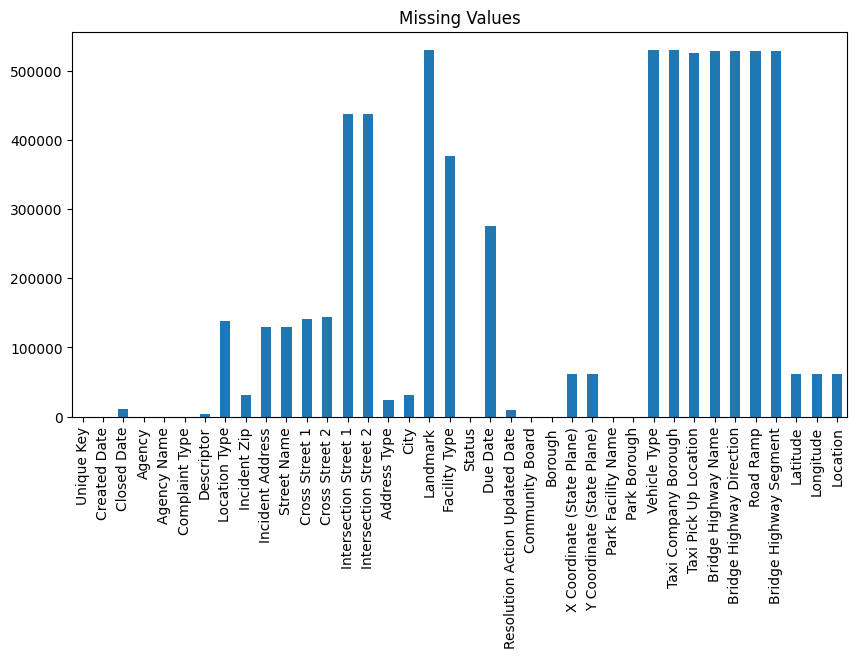

In [133]:
# Visualise this null value data on a graph

df_CSR.isnull().sum().plot(kind='bar', figsize=(10,5), title = "Missing Values")

In [134]:
df_CSR.keys()

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [135]:
un_useble = [
    'Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1',
    'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2',
    'Address Type', 'Park Facility Name', 'Park Borough',
    'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
    'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
    'Bridge Highway Segment', 'Landmark', 'X Coordinate (State Plane)',
    'Y Coordinate (State Plane)', 'Due Date',
    'Resolution Action Updated Date', 'Community Board', 'Facility Type'
]

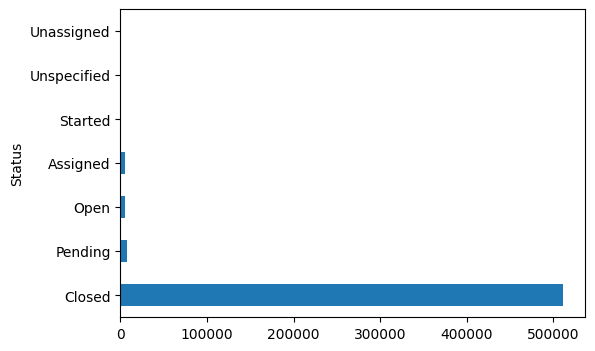

In [136]:
# Representation of values based on category from Status column by Bar chart.

df_CSR['Status'].value_counts().plot(kind = 'barh', figsize=(6,4))
plt.show()

In [137]:
df_CSR.drop(un_useble, inplace=True, axis=1)
df_CSR= df_CSR[(df_CSR['Latitude'].notnull())& (df_CSR['Longitude'].notnull()) & (df_CSR['Descriptor'].notnull())]
df_CSR = df_CSR[df_CSR['Status']=='Closed']
df_CSR.drop(['Status'],inplace=True, axis=1)
df_CSR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452259 entries, 0 to 530136
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unique Key      452259 non-null  object
 1   Created Date    452259 non-null  object
 2   Closed Date     452255 non-null  object
 3   Agency          452259 non-null  object
 4   Complaint Type  452259 non-null  object
 5   Descriptor      452259 non-null  object
 6   Location Type   343673 non-null  object
 7   Incident Zip    452114 non-null  object
 8   City            452242 non-null  object
 9   Borough         452258 non-null  object
 10  Latitude        452259 non-null  object
 11  Longitude       452259 non-null  object
 12  Location        452259 non-null  object
dtypes: object(13)
memory usage: 48.3+ MB




*   Changing data type from object to date and time by using date and time module


In [138]:
# Fill null values in 'Location Type' with 0
df_CSR['Location Type'] = df_CSR['Location Type'].fillna(0)

In [139]:


df_CSR['Created Date'] = pd.to_datetime(df_CSR['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
df_CSR['Closed Date'] = pd.to_datetime(df_CSR['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')
df_CSR.info()


<class 'pandas.core.frame.DataFrame'>
Index: 452259 entries, 0 to 530136
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unique Key      452259 non-null  object        
 1   Created Date    452259 non-null  datetime64[ns]
 2   Closed Date     452255 non-null  datetime64[ns]
 3   Agency          452259 non-null  object        
 4   Complaint Type  452259 non-null  object        
 5   Descriptor      452259 non-null  object        
 6   Location Type   452259 non-null  object        
 7   Incident Zip    452114 non-null  object        
 8   City            452242 non-null  object        
 9   Borough         452258 non-null  object        
 10  Latitude        452259 non-null  object        
 11  Longitude       452259 non-null  object        
 12  Location        452259 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 48.3+ MB


In [140]:
print(df_CSR['Created Date'].head())
print(df_CSR['Closed Date'].head())


0   2014-06-01
1   2014-06-01
2   2014-06-01
3   2014-06-01
4   2014-06-01
Name: Created Date, dtype: datetime64[ns]
0   2014-06-06 16:03:44
1   2014-06-10 00:00:00
2   2014-06-09 00:00:00
3   2014-06-20 00:00:00
4   2014-06-10 00:00:00
Name: Closed Date, dtype: datetime64[ns]


In [141]:
# Add new calumn "Request_closing_time" for colepsed time between Created Date and Closed Date
df_CSR['Request_closing_time']=df_CSR["Closed Date"]-df_CSR["Created Date"]

print(df_CSR['Request_closing_time'])

0         5 days 16:03:44
1         9 days 00:00:00
2         8 days 00:00:00
3        19 days 00:00:00
4         9 days 00:00:00
               ...       
530132   14 days 00:00:00
530133   10 days 00:00:00
530134    5 days 00:00:00
530135   10 days 00:00:00
530136    6 days 00:00:00
Name: Request_closing_time, Length: 452259, dtype: timedelta64[ns]


In [142]:
df_CSR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 452259 entries, 0 to 530136
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   Unique Key            452259 non-null  object         
 1   Created Date          452259 non-null  datetime64[ns] 
 2   Closed Date           452255 non-null  datetime64[ns] 
 3   Agency                452259 non-null  object         
 4   Complaint Type        452259 non-null  object         
 5   Descriptor            452259 non-null  object         
 6   Location Type         452259 non-null  object         
 7   Incident Zip          452114 non-null  object         
 8   City                  452242 non-null  object         
 9   Borough               452258 non-null  object         
 10  Latitude              452259 non-null  object         
 11  Longitude             452259 non-null  object         
 12  Location              452259 non-null  object    

In [143]:
# % of null values in dataset

df_CSR.isnull().sum()/len(df_CSR)*100

,0
Unique Key,0.000000
Created Date,0.000000
Closed Date,0.000884
Agency,0.000000
Complaint Type,0.000000
Descriptor,0.000000
Location Type,0.000000
Incident Zip,0.032061
City,0.003759
Borough,0.000221


In [144]:

df_CSR['Borough'].value_counts()

,count
Borough,
BROOKLYN,146120
QUEENS,112872
MANHATTAN,91372
BRONX,77802
STATEN ISLAND,24041
Unspecified,51


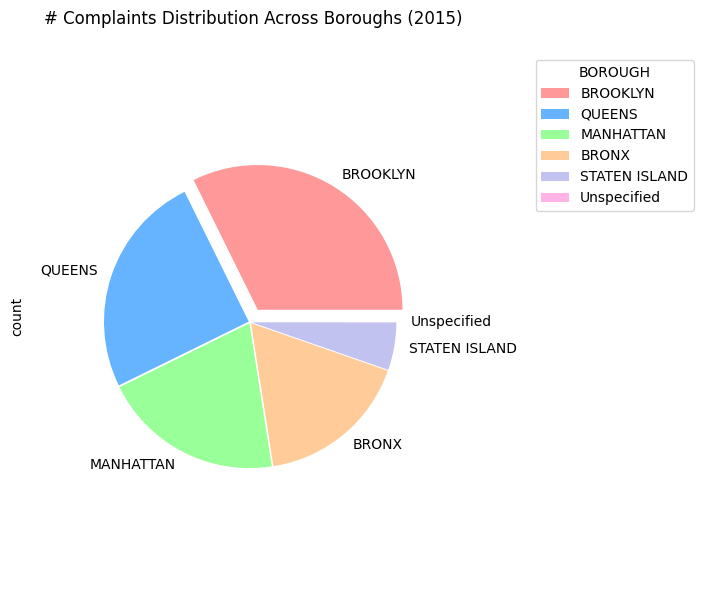

In [145]:
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB3E6']

borough_counts = df_CSR['Borough'].value_counts()

# Create explode list
explode = [0.10] + [0.01] * (len(borough_counts) - 1)

# Plot the pie chart
borough_counts.plot(kind='pie',
                    explode=explode, startangle=0, shadow=False, colors=colors,
                    figsize=(8, 6))

# Optional legend
plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5, 1))

plt.axis('equal')
plt.title('# Complaints Distribution Across Boroughs (2015)\n')
plt.tight_layout()
plt.show()

In [146]:
# Calculating avarage time we have to cal approx time for each values of time

df_CSR['Request_closing_time'].sort_values()

,Request_closing_time
325205,-1 days +18:39:25
2229,-1 days +20:02:21
102253,-1 days +21:44:54
2233,-1 days +21:46:32
2238,-1 days +22:00:33
...,...
270706,3705 days 10:12:16
22500,NaT
33912,NaT
246220,NaT


In [147]:


# Ensure 'Request_closing_time' is in timedelta format
df_CSR['Request_closing_time'] = pd.to_timedelta(df_CSR['Request_closing_time'])

# Convert to hours and add 1
df_CSR['Request_Closing_Hours'] = df_CSR['Request_closing_time'].dt.total_seconds() / 3600 + 1

# Display the relevant columns
print(df_CSR[['Request_closing_time', 'Request_Closing_Hours']].head())


  Request_closing_time  Request_Closing_Hours
0      5 days 16:03:44             137.062222
1      9 days 00:00:00             217.000000
2      8 days 00:00:00             193.000000
3     19 days 00:00:00             457.000000
4      9 days 00:00:00             217.000000


Grouping complaint type and Borough based on Request Closing Hour
and taking a visualized look of the data based on particular location what type and number of complaint accur at


In [148]:

grouped_data = df_CSR.groupby(['Complaint Type', 'Borough'])[['Request_Closing_Hours']].mean().unstack()
grouped_data.head()


Request_Closing_Hours                                        \
Borough                          BRONX    BROOKLYN     MANHATTAN      QUEENS   
Complaint Type                                                                 
APPLIANCE                   560.449811  763.293149    854.846206  811.718740   
Adopt-A-Basket            54397.116667   83.416667  68303.211667   27.866667   
Air Quality                 102.399322  103.095783     92.756827  100.370329   
Animal Abuse                  6.033006    5.006074      3.825735    4.815202   
Animal in a Park             65.801959   76.422643     85.002635  587.706376   

                                            
Borough          STATEN ISLAND Unspecified  
Complaint Type                              
APPLIANCE           322.677419         NaN  
Adopt-A-Basket    79989.850000         NaN  
Air Quality          98.564286         NaN  
Animal Abuse          4.375622         NaN  
Animal in a Park     79.992994         NaN

In [149]:
grouped_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, APPLIANCE to X-Ray Machine/Equipment
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   (Request_Closing_Hours, BRONX)          118 non-null    float64
 1   (Request_Closing_Hours, BROOKLYN)       124 non-null    float64
 2   (Request_Closing_Hours, MANHATTAN)      123 non-null    float64
 3   (Request_Closing_Hours, QUEENS)         123 non-null    float64
 4   (Request_Closing_Hours, STATEN ISLAND)  112 non-null    float64
 5   (Request_Closing_Hours, Unspecified)    10 non-null     float64
dtypes: float64(6)
memory usage: 7.0+ KB


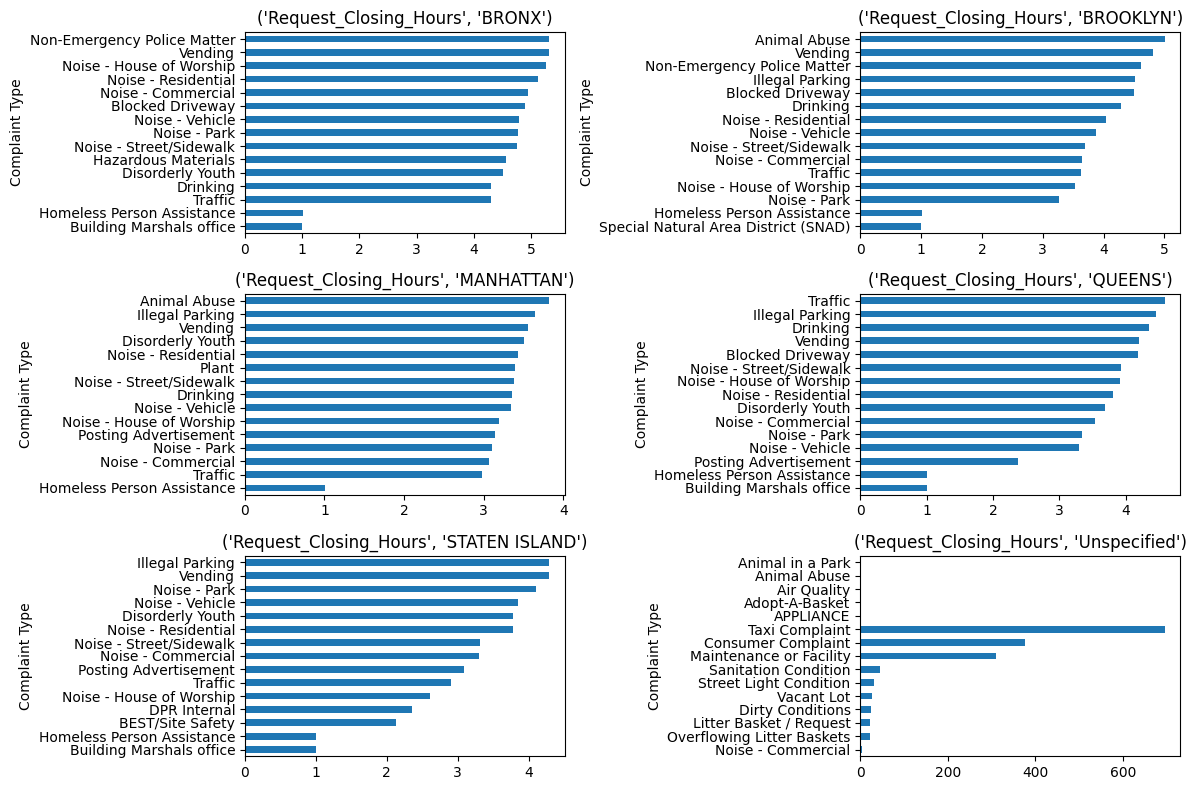

In [150]:
# Visualizing top 10 complaints in each borough using subplots

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(grouped_data.items()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)

plt.tight_layout()

<Axes: title={'center': 'Most Frequent Complaints in Brooklyn'}, xlabel='Complaint Type'>

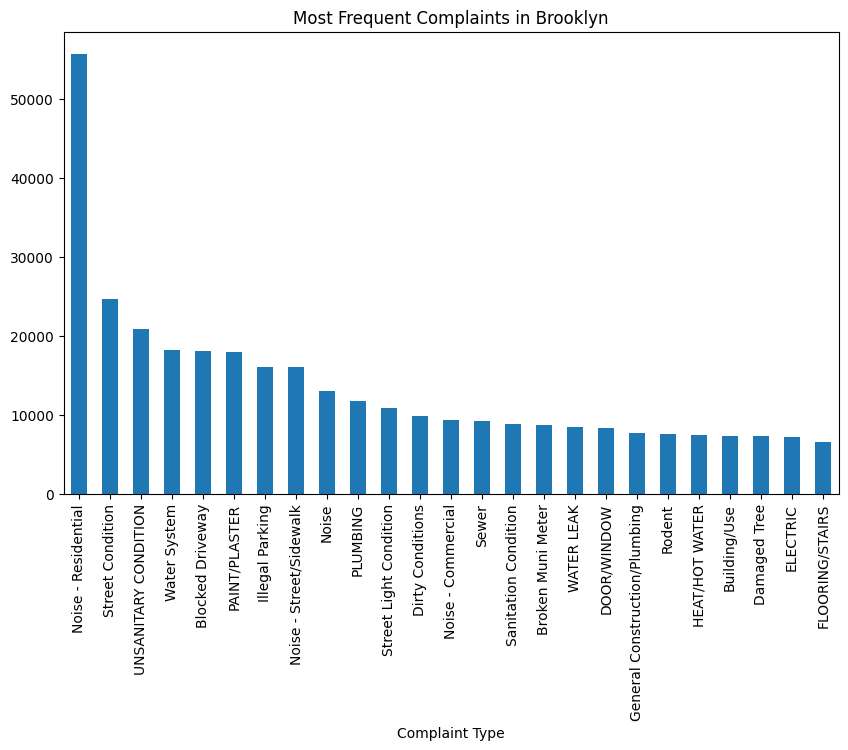

In [151]:
(df_CSR['Complaint Type'].value_counts()).head(25).plot(kind='bar', figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')


Analysis of Variance (ANOVA) test is a statistical formula used to compare variances across the means (or average) of different groups.

It is used to check whether the average response time across complaint types is similar or not
h0= average response time across complaint types is similar if p>0.05

ha=average response time across complaint types is not similar so for proof that we have check p value p<0.05

In [152]:


data_CSR = {}
for complaint in df_CSR['Complaint Type'].unique():
    # Filter out non-positive values (i.e., <= 0)
    request_closing_hours = df_CSR[df_CSR['Complaint Type'] == complaint]['Request_Closing_Hours']
    request_closing_hours = request_closing_hours[request_closing_hours > 0]  # Filter positive values

    # Check if there are valid data points for the complaint type
    if not request_closing_hours.empty:
        # Add the log-transformed data to data_CSR
        data_CSR[complaint] = np.log(request_closing_hours)



In [153]:
data_CSR[complaint].head()


,Request_Closing_Hours
344391,6.086783
440919,3.392951
447892,6.159356


In [154]:
# Print available keys to check the exact complaint type names
print(data_CSR.keys())


dict_keys(['Rodent', 'UNSANITARY CONDITION', 'WATER LEAK', 'HEAT/HOT WATER', 'APPLIANCE', 'PLUMBING', 'Unsanitary Animal Pvt Property', 'DOOR/WINDOW', 'ELECTRIC', 'FLOORING/STAIRS', 'OUTSIDE BUILDING', 'GENERAL', 'PAINT/PLASTER', 'SAFETY', 'Unsanitary Pigeon Condition', 'ELEVATOR', 'Standing Water', 'Noise - Commercial', 'Noise - Vehicle', 'Noise - Residential', 'Noise - Street/Sidewalk', 'Taxi Complaint', 'Damaged Tree', 'Street Sign - Damaged', 'Illegal Parking', 'Noise - Park', 'Noise', 'Street Condition', 'Special Projects Inspection Team (SPIT)', 'Street Light Condition', 'Water System', 'General Construction/Plumbing', 'Blocked Driveway', 'Dirty Conditions', 'Sanitation Condition', 'Sidewalk Condition', 'Consumer Complaint', 'Traffic Signal Condition', 'Illegal Tree Damage', 'Dead Tree', 'Building/Use', 'Missed Collection (All Materials)', 'Homeless Person Assistance', 'Air Quality', 'Indoor Sewage', 'Graffiti', 'Indoor Air Quality', 'Sewer', 'Noise - Helicopter', 'Food Poisoning

In [155]:

# Check all unique complaint types in df_CSR
print(df_CSR['Complaint Type'].unique())

['Rodent' 'UNSANITARY CONDITION' 'WATER LEAK' 'HEAT/HOT WATER' 'APPLIANCE'
 'PLUMBING' 'Unsanitary Animal Pvt Property' 'DOOR/WINDOW' 'ELECTRIC'
 'FLOORING/STAIRS' 'OUTSIDE BUILDING' 'GENERAL' 'PAINT/PLASTER' 'SAFETY'
 'Unsanitary Pigeon Condition' 'ELEVATOR' 'Standing Water'
 'Noise - Commercial' 'Noise - Vehicle' 'Noise - Residential'
 'Noise - Street/Sidewalk' 'Taxi Complaint' 'Damaged Tree'
 'Street Sign - Damaged' 'Illegal Parking' 'Noise - Park' 'Noise'
 'Street Condition' 'Special Projects Inspection Team (SPIT)'
 'Street Light Condition' 'Water System' 'General Construction/Plumbing'
 'Blocked Driveway' 'Dirty Conditions' 'Sanitation Condition'
 'Sidewalk Condition' 'Consumer Complaint' 'Traffic Signal Condition'
 'Illegal Tree Damage' 'Dead Tree' 'Building/Use'
 'Missed Collection (All Materials)' 'Homeless Person Assistance'
 'Air Quality' 'Indoor Sewage' 'Graffiti' 'Indoor Air Quality' 'Sewer'
 'Noise - Helicopter' 'Food Poisoning' 'Derelict Vehicle'
 'Non-Emergency Police M

In [156]:

# ANOVA test
stat, p = f_oneway(
    data_CSR['Noise - Street/Sidewalk'],
    data_CSR['Blocked Driveway'],
    data_CSR['Illegal Parking'],
    data_CSR['Derelict Vehicle'],
    data_CSR['Noise - Commercial']
)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('The average response time across complaint types is similar hence "fail to reject H0"')
else:
    print('The average response time across complaint types is not similar hence "reject H0"')


Statistics=637.857, p=0.000
The average response time across complaint types is not similar hence "reject H0"


### Checking correlation between location and complaint types

To performe corelation test we have all the values in numerical format so first task is to change cattegorical values to numerical by using getdummies()

then perform a test between location and complaint type

In [157]:
corr_test_data = df_CSR[['Complaint Type','Borough','Longitude','Latitude','City']]

In [158]:
corr_test_data = pd.concat([
    corr_test_data,
    pd.get_dummies(corr_test_data['Complaint Type'], prefix='Complaint_Type'),
    pd.get_dummies(corr_test_data['Borough'], prefix='Borough'),
    pd.get_dummies(corr_test_data['City'], prefix='City')
], axis=1)


In [159]:
# Check the data types of the columns
print(corr_test_data.dtypes)


Complaint Type     object
Borough            object
Longitude          object
Latitude           object
City               object
                    ...  
City_WOODHAVEN       bool
City_WOODSIDE        bool
City_Whitestone      bool
City_Woodhaven       bool
City_Woodside        bool
Length: 233, dtype: object


In [160]:

# Convert columns that should be numeric to numeric, if possible
corr_test_data['Longitude'] = pd.to_numeric(corr_test_data['Longitude'], errors='coerce')
corr_test_data['Latitude'] = pd.to_numeric(corr_test_data['Latitude'], errors='coerce')

# Convert categorical columns to numeric
corr_test_data = pd.get_dummies(corr_test_data)

# Now, keep only the numeric columns
corr_test_data_numeric = corr_test_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = corr_test_data_numeric.corr()
print(correlation_matrix)


           Longitude  Latitude
Longitude   1.000000  0.349719
Latitude    0.349719  1.000000


View the correlation by using heatmap using Seaborn lib



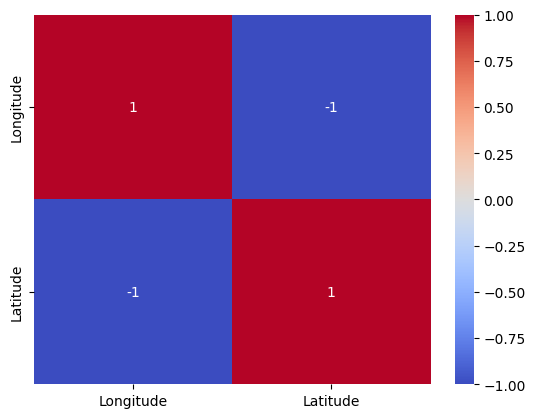

In [161]:
ax = sns.heatmap(correlation_matrix.corr(),annot=True, cmap="coolwarm", vmin=-1, vmax=1)